<a href="https://colab.research.google.com/github/hejiang2/datacamp-courses/blob/master/Manipulating_Time_Series_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Manipulating Time Series Data in Python

         date  price
0  2013-01-02  20.08
1  2013-01-03  19.78
2  2013-01-04  19.86
3  2013-01-07  19.40
4  2013-01-08  19.66


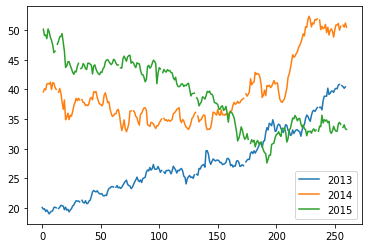

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Manipulating%20Time%20Series%20Data%20in%20Python/stock_data/yahoo.csv'
yahoo = pd.read_csv(url)
print(yahoo.head())
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace = True)

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

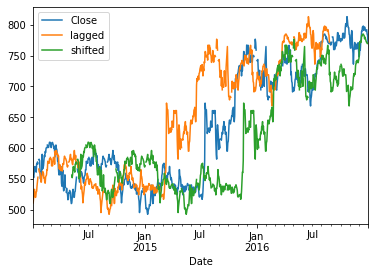

In [ ]:
url = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Manipulating%20Time%20Series%20Data%20in%20Python/stock_data/google.csv'

# Import data here
google = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods = -90)
google['shifted'] = google.Close.shift(periods = 90)

# Plot the google price series
google[['Close','lagged','shifted']].plot()
plt.show()


In [2]:
import pandas as pd
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start = start, end = end, freq = 'M')

# Create and print monthly here
monthly = pd.Series(data = [1,2], index = monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start = start, end = end, freq = 'W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method = 'bfill'))
print(monthly.reindex(weekly_dates, method = 'ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


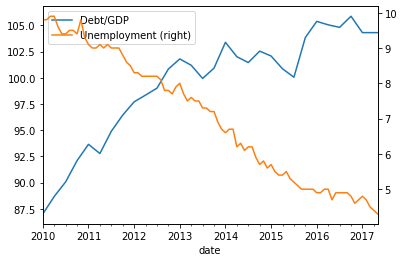

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import & inspect data here
debt_unemployment = 'https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Manipulating%20Time%20Series%20Data%20in%20Python/stock_data/debt_unemployment.csv'
data = pd.read_csv(debt_unemployment, parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


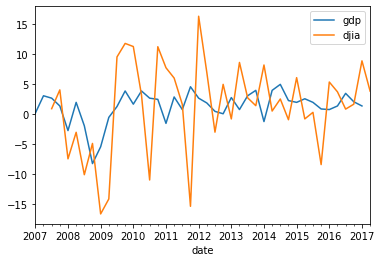

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Manipulating%20Time%20Series%20Data%20in%20Python/stock_data/gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.info()

# Import and inspect djia here
djia = pd.read_csv('https://raw.githubusercontent.com/hejiang2/datacamp-courses/master/Manipulating%20Time%20Series%20Data%20in%20Python/stock_data/djia.csv', parse_dates=['date'], index_col='date')
djia.info()

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns=['gdp','djia']
data.plot()
plt.show()

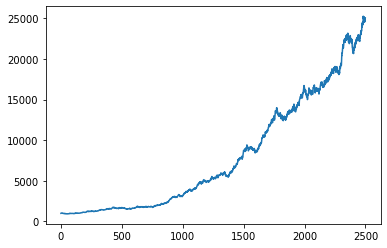

In [2]:
# build your own random walk by drawing random numbers from the normal distribution
import pandas as pd
from numpy.random import normal, seed
import matplotlib.pyplot as plt
# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show();